In [1]:
from preprocess import get_file_path, get_li
import pandas as pd
import re
import seaborn as sns

In [2]:
L, I = get_li(get_file_path('Solar_Panel_Soiling_Image_dataset/PanelImages'))
filepaths=get_file_path('Solar_Panel_Soiling_Image_dataset/PanelImages')

day=[]
month=[]
year=[]
hour=[]

for path in filepaths:
    try:
        d = str(re.search(r'solar_(.*?)_', path).group(1))
        re_m=f'solar_{d}_(.*?)_'
        m = str(re.search(re_m, path).group(1))
        re_h=f'_(.*?)__'
        h = str(re.search(re_h, path).group(1)).split('_')[-1]
        y = str(re.search(r'_(.*?)_L_', path).group(1)).split('_')[-1]
    except AttributeError:
        d=0
        m=0
        y=0
        h=0
    day.append(d)
    month.append(m)
    year.append(int(y))
    hour.append(h)

In [3]:
df=pd.DataFrame()
df['L']=L
df['I']=I
df['Day']=day
df['Month']=month
df['Year']=year
df['Hour']=hour
df.head()

,L,I,Day,Month,Year,Hour
0,0.020533,0.372043,Mon,Jun,2017,13
1,0.555993,0.308969,Fri,Jun,2017,11
2,0.153320,0.162675,Tue,Jun,2017,7
3,0.729038,0.093682,Thu,Jun,2017,17
4,0.114351,0.441263,Thu,Jun,2017,10


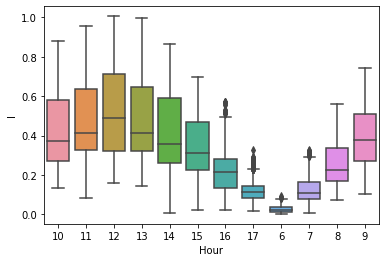

In [4]:
sns.boxplot(x='Hour', y='I', data=df);

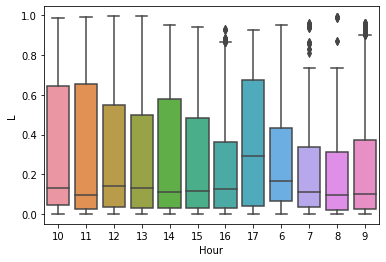

In [5]:
sns.boxplot(x='Hour', y='L', data=df);

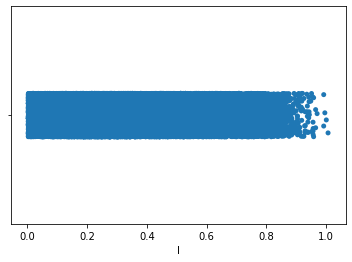

In [7]:
# Scale of Irradiance alone
sns.stripplot(x=df["I"])

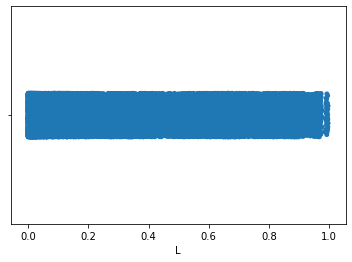

In [8]:
# Scale of Power Loss alone
sns.stripplot(x=df["L"])